In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/FinalAssesment_AI/taxi_trip_pricing.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB
None
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        951.000000       951.000000  951.000000   951.000000   
mean          27.121545     

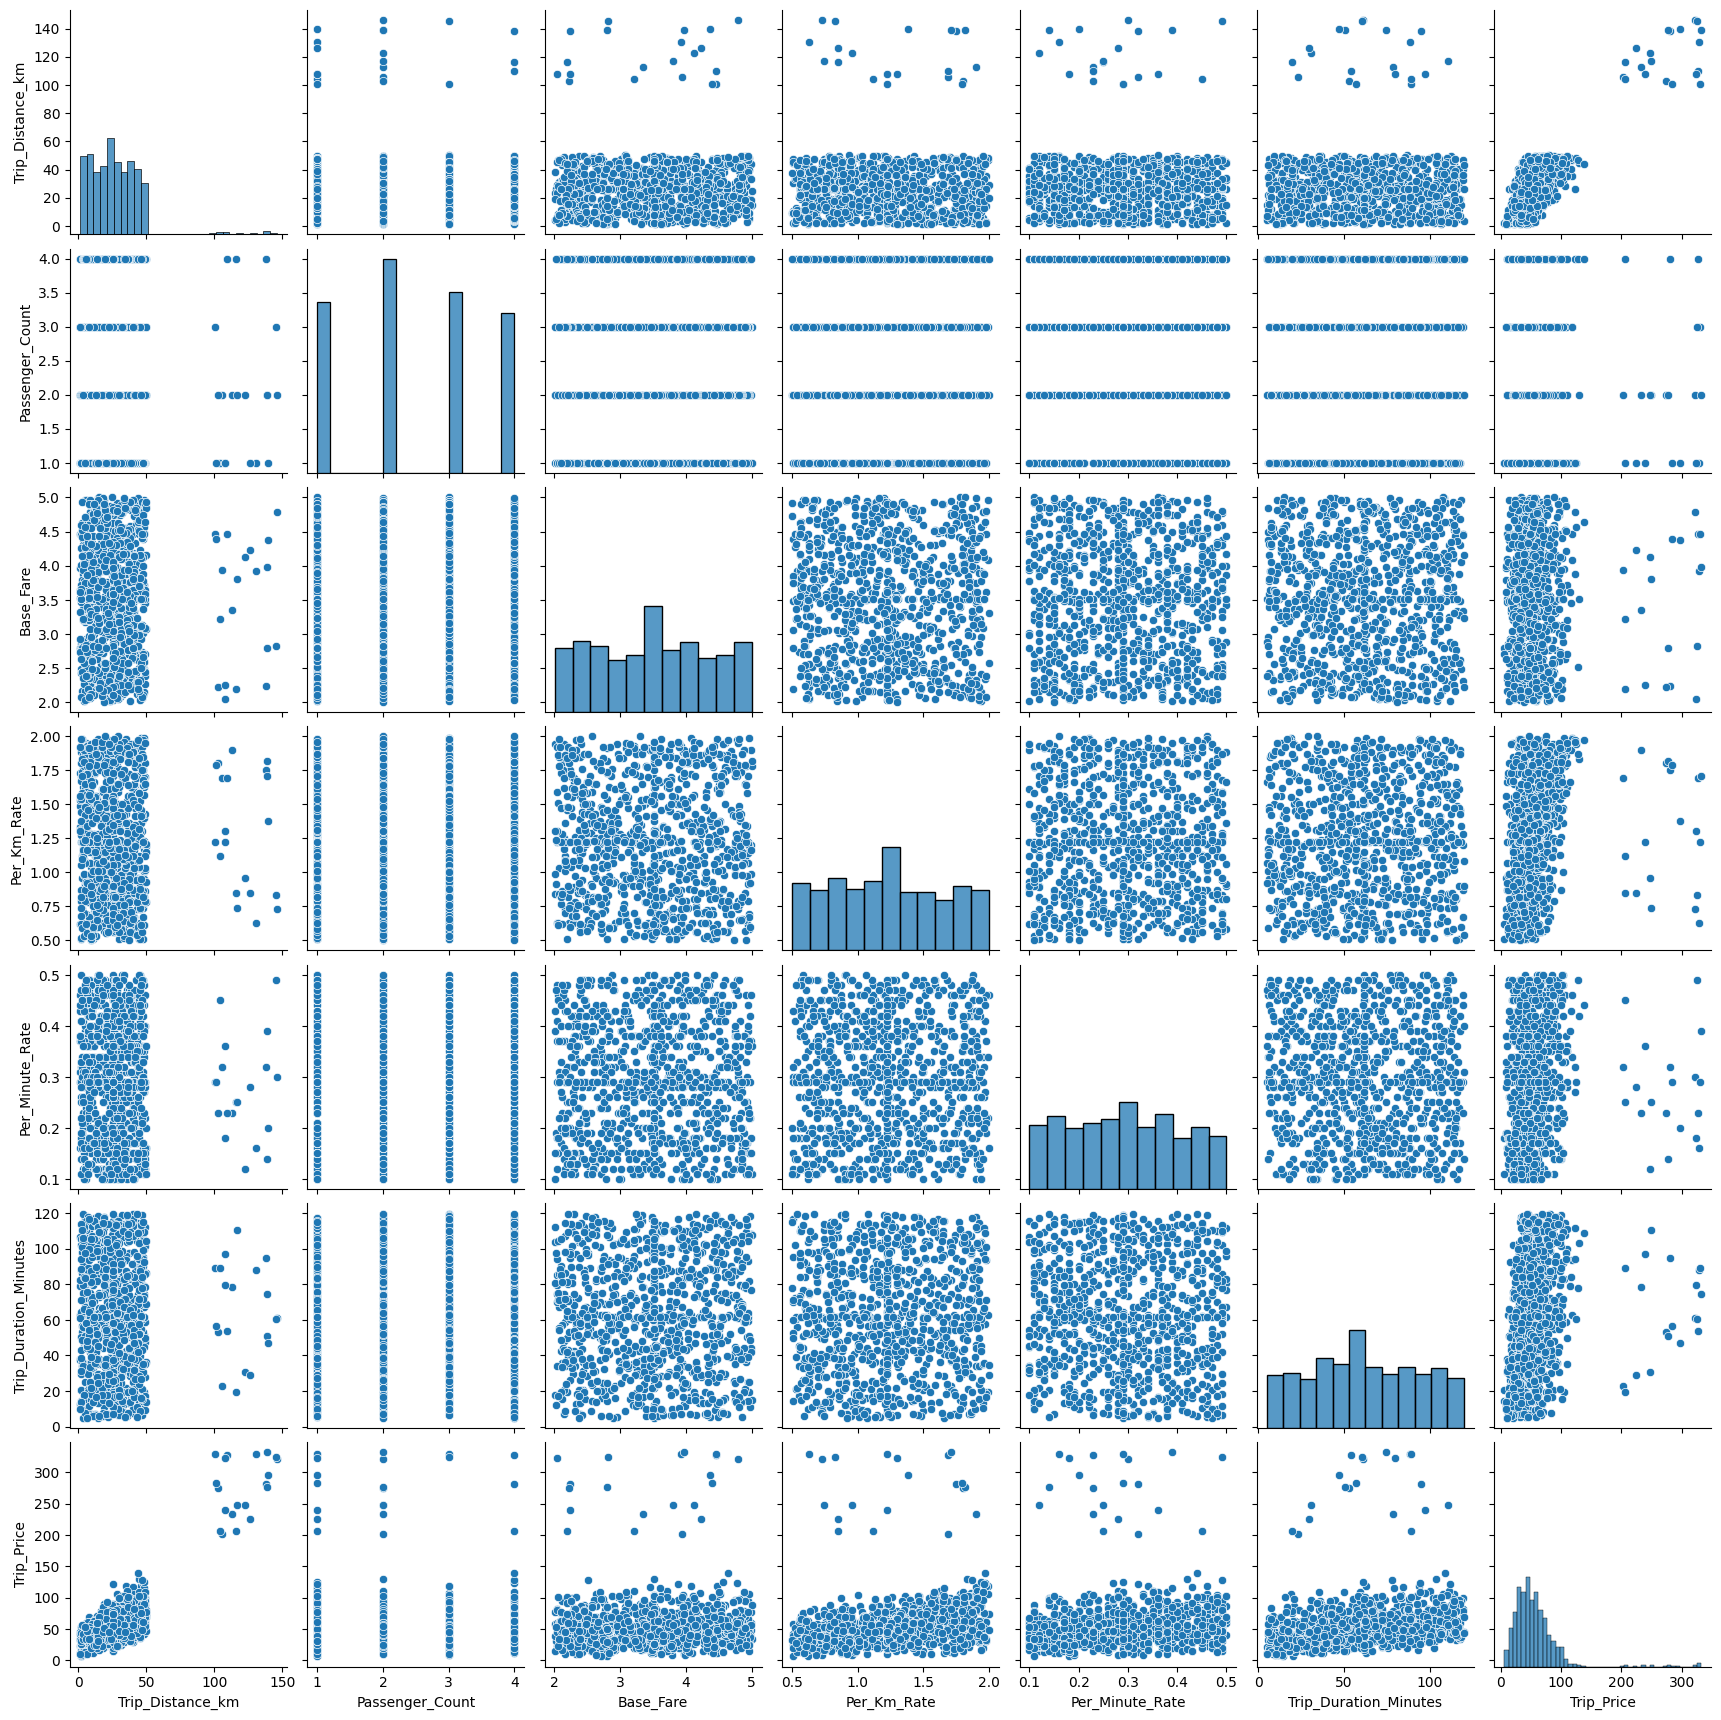

In [6]:
# Exploratory Data Analysis
print(df.info())
print(df.describe())
sns.pairplot(df)
plt.show()

In [7]:
# Handle Missing Values
df = df.dropna(subset=["Trip_Price"])
numerical_cols = df.select_dtypes(include=["float64"]).columns.tolist()
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [9]:
# One-Hot Encoding for Categorical Variables
categorical_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]
# Replace 'sparse' with 'sparse_output'
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [10]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Trip_Price"]))
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=["Trip_Price"]).columns)
df_scaled["Trip_Price"] = df["Trip_Price"].values

In [11]:
# Split Data
X = df_scaled.drop(columns=["Trip_Price"])
y = df_scaled["Trip_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
#Implement Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(X_train, y_train)
y_pred_scratch = lin_reg_scratch.predict(X_test)

In [26]:
# Handle Missing Values
df = df.dropna(subset=["Trip_Price"])
numerical_cols = df.select_dtypes(include=["float64"]).columns.tolist()
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# ... (One-Hot Encoding and Feature Scaling code) ...

# Impute missing values if any are left after previous steps
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # or 'median'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data

In [30]:
# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # This should work without the ValueError now
y_pred_lin = lin_reg.predict(X_test)

In [31]:
# Model 2: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [32]:
# Evaluate Models
mse_lin, r2_lin = mean_squared_error(y_test, y_pred_lin), r2_score(y_test, y_pred_lin)
mse_rf, r2_rf = mean_squared_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)
print(f"Linear Regression -> MSE: {mse_lin:.2f}, R2: {r2_lin:.2f}")
print(f"Random Forest -> MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Linear Regression -> MSE: 289.51, R2: 0.88
Random Forest -> MSE: 129.06, R2: 0.94


In [33]:
# Hyperparameter Tuning
rf_params = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring="r2", n_jobs=-1)
grid_rf.fit(X_train, y_train)

ridge_params = {"alpha": [0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2", n_jobs=-1)
grid_ridge.fit(X_train, y_train)

print(f"Best RF Params: {grid_rf.best_params_}")
print(f"Best Ridge Params: {grid_ridge.best_params_}")


Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Ridge Params: {'alpha': 10}


In [85]:
import pandas as pd
import numpy as np

# Get the feature names from the encoder
categorical_features = encoder.get_feature_names_out(categorical_cols)

# Get numerical feature names (excluding the target variable)
numerical_features = df_scaled.drop(columns=["Trip_Price"]).columns

# Combine numerical and categorical feature names
feature_names = np.concatenate([numerical_features, categorical_features])

# Ensure feature_names length matches the feature importances length
feature_importance_values = grid_rf.best_estimator_.feature_importances_

# Trim feature_names if it's longer than feature_importances
feature_names = feature_names[:len(feature_importance_values)]

# Create the Series with the corrected feature names
feature_importance = pd.Series(feature_importance_values, index=feature_names)

# Display feature importance
print(feature_importance)

Trip_Distance_km             0.778195
Passenger_Count              0.003086
Base_Fare                    0.009232
Per_Km_Rate                  0.091558
Per_Minute_Rate              0.039382
Trip_Duration_Minutes        0.071408
Time_of_Day_Evening          0.001148
Time_of_Day_Morning          0.000862
Time_of_Day_Night            0.000526
Time_of_Day_nan              0.000915
Day_of_Week_Weekend          0.001377
Day_of_Week_nan              0.000795
Traffic_Conditions_Low       0.000848
Traffic_Conditions_Medium    0.000667
dtype: float64


In [89]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure X_train and X_test are DataFrames with correct column names
X_train = pd.DataFrame(X_train, columns=feature_names)  # Use feature_names for columns
X_test = pd.DataFrame(X_test, columns=feature_names)    # Use feature_names for columns

# Define best_features based on feature importance
best_features = feature_importance.sort_values(ascending=False).index[:5].tolist()  # Convert to list

# Train the final model
final_model = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
final_model.fit(X_train[best_features], y_train)

# Make predictions
y_pred_final = final_model.predict(X_test[best_features])

# Evaluate the model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Optimized Model -> MSE: {mse_final:.2f}, R2: {r2_final:.2f}")


Final Optimized Model -> MSE: 2355.48, R2: -0.01
